1. Data Exploration and Understanding:
a. Initial Inspection:

In [2]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\GUIDE_Train.csv\GUIDE_Train.csv")

# 1. View first few rows of the dataset
print("🔹 First 5 rows:")
print(train_df.head())

🔹 First 5 rows:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  AntispamDire

In [4]:
# 2. Get a concise summary of the dataset
print("\n🔹 Dataset Info:")
print(train_df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailCl

In [5]:

# 3. Check for missing values
print("\n🔹 Missing Values:")
print(train_df.isnull().sum())


🔹 Missing Values:
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName             

In [6]:
# 4. Get basic statistics for numerical features
print("\n🔹 Descriptive Statistics:")
print(train_df.describe())


🔹 Descriptive Statistics:
                 Id         OrgId    IncidentId       AlertId    DetectorId  \
count  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06   
mean   8.425494e+11  1.815800e+02  7.066349e+04  4.065188e+05  1.106724e+02   
std    4.962499e+11  3.867784e+02  1.208369e+05  4.592827e+05  4.351038e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.123169e+11  1.000000e+01  5.040000e+02  2.324200e+04  2.000000e+00   
50%    8.418136e+11  4.500000e+01  1.033600e+04  2.166520e+05  9.000000e+00   
75%    1.271310e+12  1.710000e+02  8.432900e+04  6.715770e+05  4.500000e+01   
max    1.709397e+12  6.147000e+03  5.997060e+05  1.721456e+06  9.522000e+03   

         AlertTitle      DeviceId        Sha256     IpAddress           Url  \
count  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06   
mean   2.947315e+03  9.566476e+04  1.287191e+05  2.857506e+05  1.503317e+05   
std    1.146150e+04  1.6

In [7]:
# 5. Identify categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['number']).columns.tolist()

print(f"\n🔹 Categorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"🔹 Numerical Columns ({len(numerical_cols)}): {numerical_cols}")


🔹 Categorical Columns (14): ['Timestamp', 'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']
🔹 Numerical Columns (31): ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City']


In [8]:

# 6. Check target variable distribution
print("\n🔹 Target Variable Distribution:")
print(train_df['IncidentGrade'].value_counts())



🔹 Target Variable Distribution:
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64


Load and Initial Inspection:

In [9]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\GUIDE_Train.csv\GUIDE_Train.csv")

# 1. View first few rows of the dataset
print("🔹 First 5 rows:")
print(train_df.head())

# 2. Get a concise summary of the dataset
print("\n🔹 Dataset Info:")
print(train_df.info())

# 3. Check for missing values
print("\n🔹 Missing Values:")
print(train_df.isnull().sum())

# 4. Get basic statistics for numerical features
print("\n🔹 Descriptive Statistics:")
print(train_df.describe())

# 5. Identify categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['number']).columns.tolist()

print(f"\n🔹 Categorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"🔹 Numerical Columns ({len(numerical_cols)}): {numerical_cols}")

# 6. Check target variable distribution
print("\n🔹 Target Variable Distribution:")
print(train_df['IncidentGrade'].value_counts())  

🔹 First 5 rows:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  AntispamDire

b.Exploratory Data Analysis (EDA)

1. Target Variable: IncidentGrade Distribution

C:\Users\91809\AppData\Local\Temp\ipykernel_8904\1185211501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='IncidentGrade', order=train_df['IncidentGrade'].value_counts().index, palette='Set2')


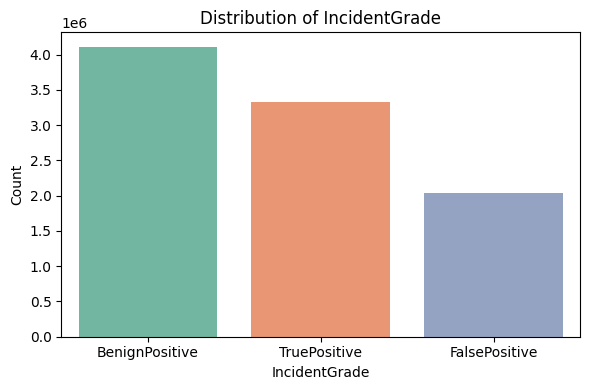

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='IncidentGrade', order=train_df['IncidentGrade'].value_counts().index, palette='Set2')
plt.title('Distribution of IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


2. Category-wise Distribution by Target

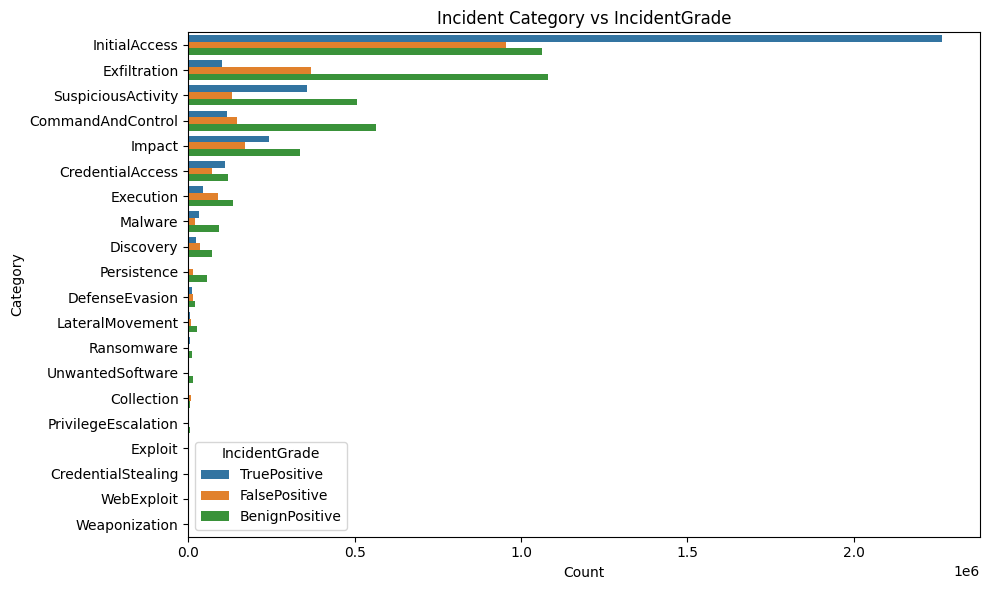

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_df, y='Category', hue='IncidentGrade', order=train_df['Category'].value_counts().index)
plt.title('Incident Category vs IncidentGrade')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='IncidentGrade')
plt.tight_layout()
plt.show()


3. Time-Based Patterns

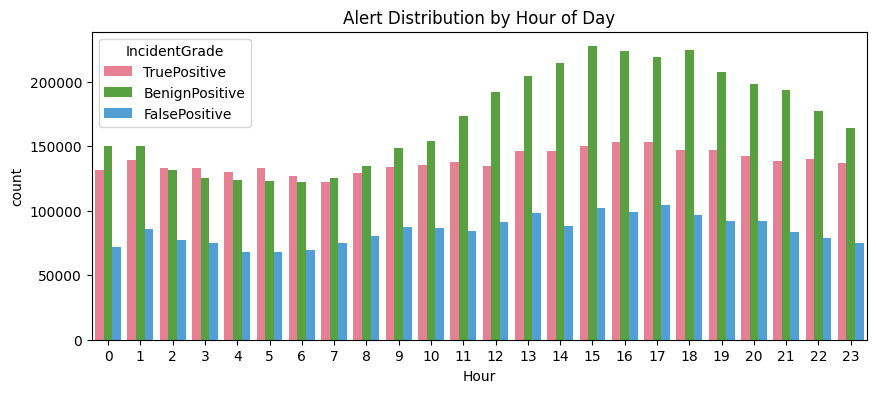

In [12]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Weekday'] = train_df['Timestamp'].dt.day_name()

# Hourly Attack Frequency
plt.figure(figsize=(10,4))
sns.countplot(x='Hour', hue='IncidentGrade', data=train_df, palette='husl')
plt.title('Alert Distribution by Hour of Day')
plt.show()


4. Correlation Matrix

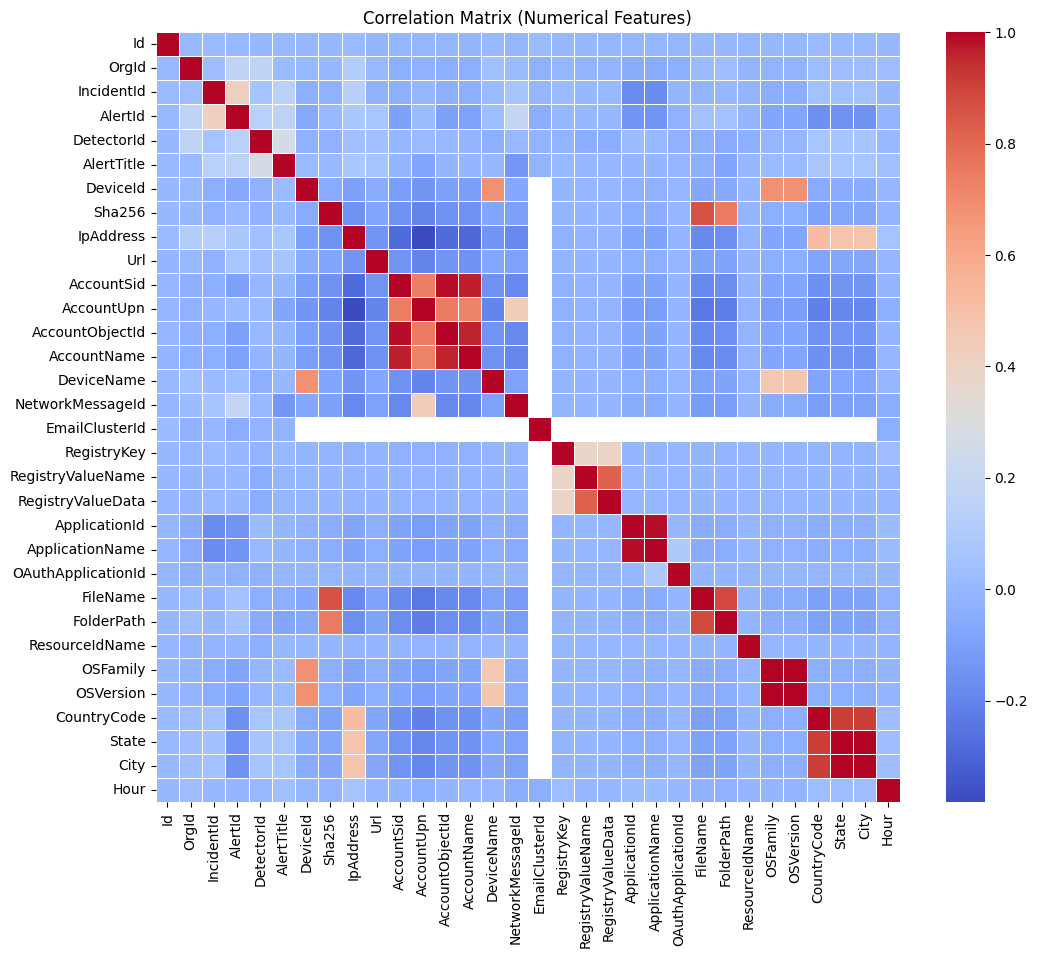

In [13]:
numerical_cols = train_df.select_dtypes(include='number').columns
corr = train_df[numerical_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


5. Missing Values Heatmap

In [14]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

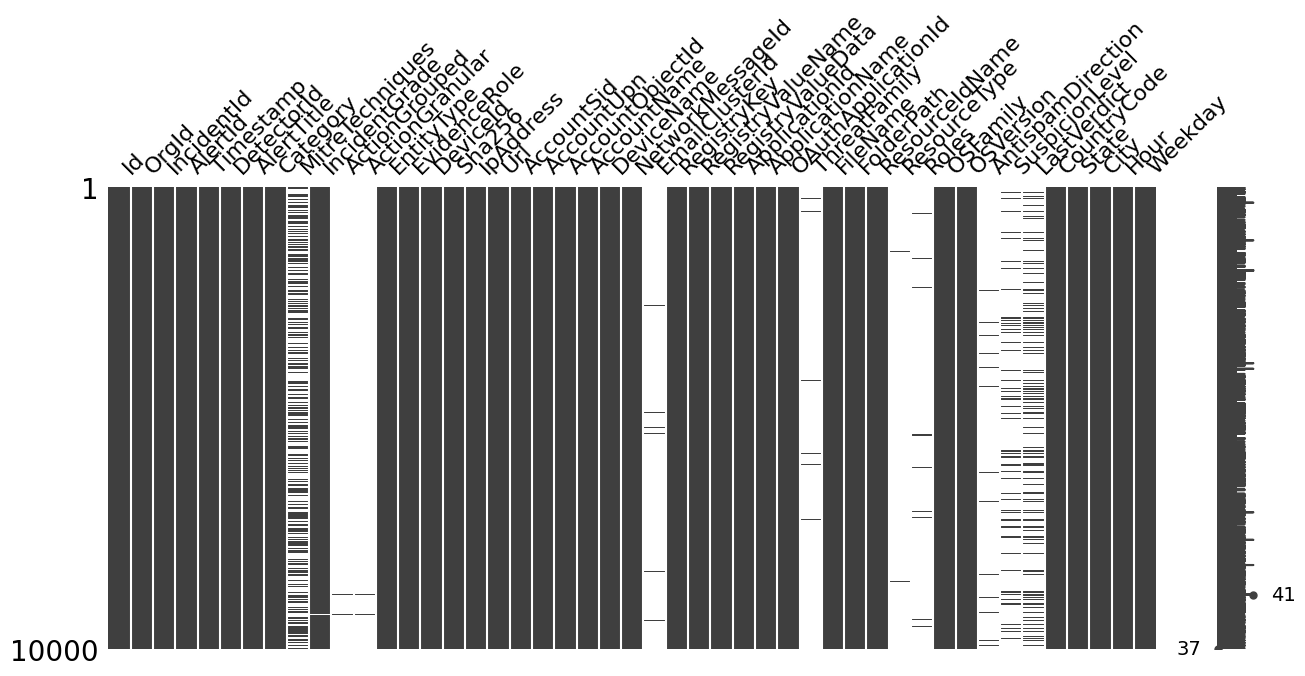

In [15]:
import missingno as msno
msno.matrix(train_df.sample(10000), figsize=(15, 6))


 6. Suspicion Level & Verdict Impact

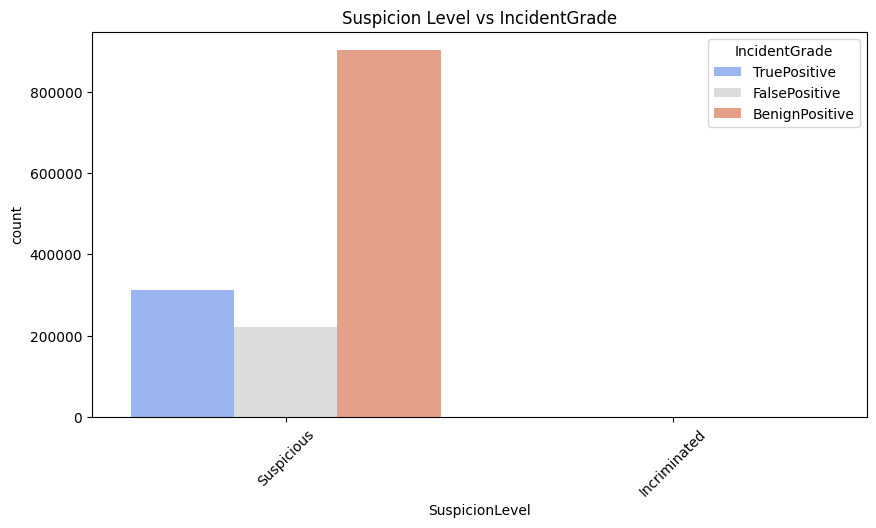

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='SuspicionLevel', hue='IncidentGrade', palette='coolwarm')
plt.title('Suspicion Level vs IncidentGrade')
plt.xticks(rotation=45)
plt.show()


2. Data Preprocessing:
a.Handling Missing Data:

In [17]:
import pandas as pd


# Load dataset
df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\GUIDE_Train.csv\GUIDE_Train.csv")


# 1. Quick Overview of Missing Data
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_summary / len(df)) * 100
print("Missing Values (%):\n", missing_percentage[missing_percentage > 0])

Missing Values (%):
 ResourceType         99.925658
ActionGrouped        99.410897
ActionGranular       99.410897
ThreatFamily         99.213173
EmailClusterId       98.982729
AntispamDirection    98.136965
Roles                97.707736
SuspicionLevel       84.825536
LastVerdict          76.523030
MitreTechniques      57.460120
IncidentGrade         0.539465
dtype: float64


In [18]:
# 2. Fill Text-Based Features with "Unknown"
text_columns = ['MitreTechniques', 'ResourceType', 'Roles', 'AntispamDirection']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [19]:
# 3. Fill Categorical Features with "Missing"
categorical_columns = ['SuspicionLevel', 'LastVerdict']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Missing')
        df[f'{col}_is_missing'] = df[col] == 'Missing'  

In [20]:
# 4. Handle Timestamp (Convert & Extract)
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['Hour'] = df['Timestamp'].dt.hour
    df['Day'] = df['Timestamp'].dt.day
    df['Weekday'] = df['Timestamp'].dt.weekday
    df.drop('Timestamp', axis=1, inplace=True)  

In [21]:
# 5. Optionally Drop Columns with Too Many Nulls
# Drop columns with > 80% missing
threshold = 0.8
to_drop = missing_percentage[missing_percentage > (threshold * 100)].index
df.drop(columns=to_drop, inplace=True)
print(f"Dropped columns: {list(to_drop)}")

Dropped columns: ['ResourceType', 'ActionGrouped', 'ActionGranular', 'ThreatFamily', 'EmailClusterId', 'AntispamDirection', 'Roles', 'SuspicionLevel']


In [22]:
# 6. (Optional) Encode or Save
# You can continue with encoding categorical variables here or save cleaned data
df.to_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\cleaned_dataset.csv", index=False)
print("✅ Missing value handling complete. Cleaned dataset saved.")

✅ Missing value handling complete. Cleaned dataset saved.


b.Feature Engineering

In [23]:
Clean_df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\cleaned_dataset.csv")

Clean_df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,...,OSVersion,LastVerdict,CountryCode,State,City,SuspicionLevel_is_missing,LastVerdict_is_missing,Hour,Day,Weekday
0,180388628218,0,612,123247,7,6,InitialAccess,Unknown,TruePositive,Ip,...,66,Missing,31,6,3,True,True,6,4,1
1,455266534868,88,326,210035,58,43,Exfiltration,Unknown,FalsePositive,User,...,66,Missing,242,1445,10630,True,True,3,14,4
2,1056561957389,809,58352,712507,423,298,InitialAccess,T1189,FalsePositive,Url,...,66,Suspicious,242,1445,10630,False,False,4,13,3
3,1279900258736,92,32992,774301,2,2,CommandAndControl,Unknown,BenignPositive,Url,...,66,Suspicious,242,1445,10630,False,False,16,10,0
4,214748368522,148,4359,188041,9,74,Execution,Unknown,TruePositive,User,...,66,Missing,242,1445,10630,True,True,1,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,Unknown,TruePositive,CloudLogonRequest,...,66,Missing,242,1445,10630,True,True,15,8,5
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,Unknown,BenignPositive,Url,...,66,Suspicious,242,1445,10630,False,False,9,6,3
9516834,867583395122,44,14117,7425,78,57,Exfiltration,Unknown,BenignPositive,MailMessage,...,66,Missing,242,1445,10630,True,True,22,11,1
9516835,395136991850,43,644,8973,52,10,Impact,Unknown,BenignPositive,Ip,...,66,Missing,242,1445,10630,True,True,23,20,0


In [24]:
import pandas as pd
import numpy as np


# 1. Timestamp Based
Clean_df['is_weekend'] = Clean_df['Weekday'].isin([5, 6]).astype(int)
Clean_df['day_period'] = pd.cut(Clean_df['Hour'], bins=[-1, 6, 12, 18, 24],
                          labels=['Night', 'Morning', 'Afternoon', 'Evening'])



In [25]:
# 2. Location Combined Features
df['LocationStr'] = df['CountryCode'].astype(str) + '_' + df['State'].astype(str) + '_' + df['City'].astype(str)

In [26]:
# 3. Risk-Based Features
Clean_df['is_high_risk_time'] = Clean_df['Hour'].isin([0, 1, 2, 3, 4, 22, 23]).astype(int)
Clean_df['is_suspicious_activity'] = ((Clean_df['SuspicionLevel_is_missing'] == 'Suspicious') | 
                                (Clean_df['LastVerdict'] == 'Suspicious')).astype(int)

In [27]:
# 4. Aggregated Count Features
Clean_df['alerts_per_org'] = Clean_df.groupby('OrgId')['AlertId'].transform('count')
Clean_df['alerts_per_detector'] = Clean_df.groupby('DetectorId')['AlertId'].transform('count')
Clean_df['alerts_per_category'] =Clean_df.groupby('Category')['AlertId'].transform('count')

In [28]:
# 5. Log Transformation (to normalize skewed IDs)
for col in ['Id', 'AlertId', 'IncidentId']:
    Clean_df[f'{col}_log'] = np.log1p(Clean_df[col])

In [29]:
# 6. Clean-up or Encoding Prep
# Convert 'day_period' to string for later encoding
Clean_df['day_period'] = Clean_df['day_period'].astype(str)

In [30]:

# Save enhanced dataset
Clean_df.to_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\enhanced_dataset.csv", index=False)
print("✅ Feature engineering complete. Enhanced dataset saved.")

✅ Feature engineering complete. Enhanced dataset saved.


 C. Encoding Categorical Variables (Feature Engineering)

In [3]:
import pandas as pd

en_df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\enhanced_dataset.csv")

en_df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,...,is_weekend,day_period,is_high_risk_time,is_suspicious_activity,alerts_per_org,alerts_per_detector,alerts_per_category,Id_log,AlertId_log,IncidentId_log
0,180388628218,0,612,123247,7,6,InitialAccess,Unknown,TruePositive,Ip,...,0,Night,0,0,845009,309093,4293041,25.918379,11.721954,6.418365
1,455266534868,88,326,210035,58,43,Exfiltration,Unknown,FalsePositive,User,...,0,Night,1,0,24244,23964,1577965,26.844149,12.255034,5.789960
2,1056561957389,809,58352,712507,423,298,InitialAccess,T1189,FalsePositive,Url,...,0,Night,1,1,961,1214,4293041,27.686041,13.476546,10.974266
3,1279900258736,92,32992,774301,2,2,CommandAndControl,Unknown,BenignPositive,Url,...,0,Afternoon,0,1,16926,597497,826691,27.877803,13.559717,10.404051
4,214748368522,148,4359,188041,9,74,Execution,Unknown,TruePositive,User,...,1,Night,1,0,13938,154113,267594,26.092733,12.144421,8.380227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,Unknown,TruePositive,CloudLogonRequest,...,1,Afternoon,0,0,845009,309093,4293041,27.686041,13.115605,4.510860
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,Unknown,BenignPositive,Url,...,0,Morning,0,1,33691,597497,826691,27.836702,13.525649,12.187965
9516834,867583395122,44,14117,7425,78,57,Exfiltration,Unknown,BenignPositive,MailMessage,...,0,Evening,1,0,45128,14297,1577965,27.488977,8.912743,9.555206
9516835,395136991850,43,644,8973,52,10,Impact,Unknown,BenignPositive,Ip,...,0,Evening,1,0,48983,24002,750885,26.702498,9.102087,6.469250


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# === Label Encoding for ordinal or ID-like categorical columns ===
label_encode_cols = ['MitreTechniques', 'IncidentGrade', 'EntityType']

label_encoders = {}
for col in label_encode_cols:
    if col in en_df.columns:
        le = LabelEncoder()
        en_df[col] = le.fit_transform(en_df[col])
        label_encoders[col] = le
    else:
        print(f"'{col}' not found for Label Encoding")

# === One-Hot Encoding for nominal categorical columns ===
one_hot_encode_cols = ['Category', 'day_period']

# Check if the columns are still in the dataframe before encoding
for col in one_hot_encode_cols:
    if col in en_df.columns:
        en_df = pd.get_dummies(en_df, columns=[col], drop_first=True)
    else:
        print(f"'{col}' already encoded or not found in DataFrame")

# === Optional: Target/Mean Encoding Example (commented out for now) ===
# from category_encoders import TargetEncoder
# target_encoder = TargetEncoder()
# en_df['MitreTechniques'] = target_encoder.fit_transform(en_df['MitreTechniques'], en_df['target_column'])

# === Output sample ===
print("Transformed DataFrame:")
print(en_df.head())


Transformed DataFrame:
              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

   MitreTechniques  IncidentGrade  EntityType EvidenceRole  ...  \
0             1193              2          15      Related  ...   
1             1193              1          32     Impacted  ...   
2              864              1          31      Related  ...   
3             1193              0          31      Related  ...   
4             1193              2          32     Impacted  ...   

   Category_Persistence  Category_PrivilegeEscalation  Category_Ransomware  \
0                 False                         False          

3. Data Splitting:

Train-Validation Split: 

In [6]:
from sklearn.model_selection import train_test_split

# Step 1: Identify the target column
target_column = 'IncidentGrade'  

# Step 2: Prepare the feature matrix (X) and target vector (y)
# Drop non-informative or ID columns
id_cols = ['Id', 'IncidentId', 'AlertId']  # Add/remove IDs based on your feature importance
X = en_df.drop(columns=id_cols + [target_column])
y = en_df[target_column]

# Step 3: Convert boolean columns to int if not done already
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Step 4: Perform the train-validation split (80-20 here)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to maintain class balance
)

# Show shapes
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")


Train shape: (7613469, 67), Validation shape: (1903368, 67)


b. Stratification

Target Distribution in Entire Dataset:
IncidentGrade
0    0.431952
2    0.349140
1    0.213513
3    0.005395
Name: proportion, dtype: float64


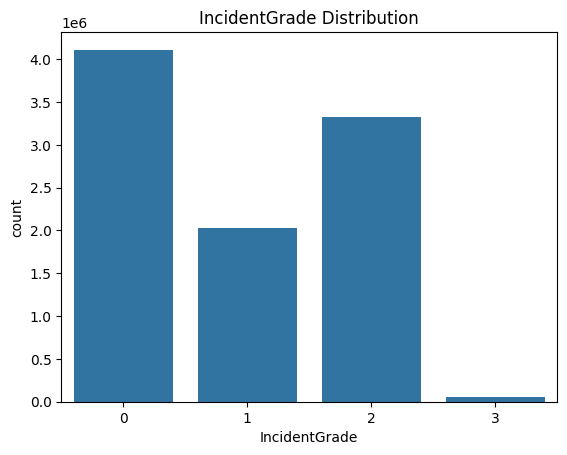

In [7]:
# Check class distribution
print("Target Distribution in Entire Dataset:")
print(y.value_counts(normalize=True))

# Optional: Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("IncidentGrade Distribution")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Stratified split to preserve class proportions
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# Verify the distribution
print("Train Target Distribution:")
print(y_train.value_counts(normalize=True))
print("\nValidation Target Distribution:")
print(y_val.value_counts(normalize=True))


Train Target Distribution:
IncidentGrade
0    0.431952
2    0.349140
1    0.213513
3    0.005395
Name: proportion, dtype: float64

Validation Target Distribution:
IncidentGrade
0    0.431952
2    0.349141
1    0.213513
3    0.005395
Name: proportion, dtype: float64


4. Model Selection and Training:

a. Baseline Model:
Logistic Regression (Baseline)

In [11]:
# Function to detect columns with non-numeric values
def get_non_numeric_columns(df):
    return [col for col in df.columns if df[col].dtype == 'object' or not pd.api.types.is_numeric_dtype(df[col])]

non_numeric_cols = get_non_numeric_columns(X_train)
print("Columns needing encoding:", non_numeric_cols)


Columns needing encoding: ['EvidenceRole', 'LastVerdict']


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in non_numeric_cols:
    le = LabelEncoder()
    
    # Fit on train
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    
    # Create a mapping dict from fitted classes
    label_map = dict(zip(le.classes_, le.transform(le.classes_)))
    
    # Transform val using mapping, unseen labels get -1
    X_val[col] = X_val[col].astype(str).map(label_map).fillna(-1).astype(int)
    
    # Store encoder
    label_encoders[col] = le


Solution: Encode 'EvidenceRole'

In [13]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# Apply Label Encoding to those
le = LabelEncoder()
for col in non_numeric_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])


Non-numeric columns: []


In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)


In [15]:
# Train on a small sample for quick feedback
logreg.fit(X_train.sample(100_000, random_state=42), y_train.sample(100_000, random_state=42))


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

 1. Train on a Sample (for now)

In [16]:
# Sample a smaller subset for faster, lighter testing
X_train_sample = X_train.sample(n=100_000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

logreg.fit(X_train_sample, y_train_sample)

y_pred_logreg = logreg.predict(X_val)

# Evaluation as before


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
logreg = LogisticRegression(
    max_iter=200,
    class_weight='balanced',
    solver='lbfgs',
    n_jobs=-1,
    random_state=42,
    tol=1e-3
)


Use sparse-aware models instead of LogisticRegression

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

# Train the model
sgd = SGDClassifier(loss='log_loss', class_weight='balanced', max_iter=1000, random_state=42, n_jobs=-1)
sgd.fit(X_train_sample, y_train_sample)

# Predict on validation set
y_pred = sgd.predict(X_val)

# Evaluation
print(classification_report(y_val, y_pred, target_names=['TP', 'BP', 'FP', 'Other']))


              precision    recall  f1-score   support

          TP       0.57      0.66      0.61    822164
          BP       0.30      0.46      0.37    406393
          FP       0.90      0.33      0.48    664543
       Other       0.10      0.79      0.17     10268

    accuracy                           0.50   1903368
   macro avg       0.47      0.56      0.41   1903368
weighted avg       0.63      0.50      0.51   1903368



In [19]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss', class_weight='balanced', max_iter=1000, random_state=42, n_jobs=-1)
sgd.fit(X_train_sample, y_train_sample)
y_pred = sgd.predict(X_val)

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.66      0.61    822164
           1       0.30      0.46      0.37    406393
           2       0.90      0.33      0.48    664543
           3       0.10      0.79      0.17     10268

    accuracy                           0.50   1903368
   macro avg       0.47      0.56      0.41   1903368
weighted avg       0.63      0.50      0.51   1903368



 1. Try class-specific sampling

In [20]:
# Combine features and labels into a DataFrame with limited size
sample_limit = 1000000  # 1 million rows
X_temp, _, y_temp, _ = train_test_split(X_train, y_train, train_size=sample_limit, stratify=y_train, random_state=42)

df_sample = pd.DataFrame(X_temp)
df_sample['label'] = y_temp.values  # Ensure label is a column

# Proceed with resampling as before


In [22]:
from sklearn.utils import resample

# Combine X and y for sampling
df_sample = X_train.copy()
df_sample['label'] = y_train

# Separate by class
df_class_0 = df_sample[df_sample['label'] == 0]
df_class_1 = df_sample[df_sample['label'] == 1]
df_class_2 = df_sample[df_sample['label'] == 2]
df_class_3 = df_sample[df_sample['label'] == 3]

# Resample
df_class_1_upsampled = resample(df_class_1, replace=True, n_samples=100000, random_state=42)
df_class_3_upsampled = resample(df_class_3, replace=True, n_samples=100000, random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_class_0.sample(n=100000),
                         df_class_2.sample(n=100000),
                         df_class_1_upsampled,
                         df_class_3_upsampled]).sample(frac=1, random_state=42)

X_balanced = df_balanced.drop(columns='label')
y_balanced = df_balanced['label']


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)
X_val_scaled = scaler.transform(X_val)

sgd.fit(X_balanced_scaled, y_balanced)
y_pred = sgd.predict(X_val_scaled)


SGDClassifier

In [24]:
# Sample a manageable portion of the validation set
val_sample_indices = y_val.sample(n=100_000, random_state=42).index
X_val_sample = X_val.loc[val_sample_indices]
y_val_sample = y_val.loc[val_sample_indices]

# Scale the validation sample
X_val_sample_scaled = scaler.transform(X_val_sample)

# Predict
y_pred = sgd.predict(X_val_sample_scaled)

# Report
print("📊 Classification Report (SGDClassifier - Sampled Validation Set):")
print(classification_report(y_val_sample, y_pred))


📊 Classification Report (SGDClassifier - Sampled Validation Set):
              precision    recall  f1-score   support

           0       0.65      0.59      0.62     43398
           1       0.41      0.50      0.45     21164
           2       0.74      0.61      0.67     34918
           3       0.09      0.95      0.16       520

    accuracy                           0.58    100000
   macro avg       0.47      0.66      0.47    100000
weighted avg       0.63      0.58      0.60    100000



Random Forest (Baseline Ensemble)

In [31]:
from sklearn.model_selection import RandomizedSearchCV


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameter search space
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search
rf_search = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, 
    n_iter=10, scoring='f1_weighted', 
    cv=3, verbose=1, n_jobs=1
)


In [34]:
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, 
                               n_iter=10, scoring='f1_weighted', 
                               cv=3, verbose=1, n_jobs=1)


In [27]:
# Example: Reduce to 20% for tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train_sample, y_train_sample, 
                                                      train_size=0.2, stratify=y_train_sample, random_state=42)


In [35]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

halving_search = HalvingRandomSearchCV(
    rf, param_distributions=param_dist_rf,
    scoring='f1_weighted', factor=2, random_state=42, n_jobs=1, verbose=1
)

halving_search.fit(X_train_sample, y_train_sample)


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 12
min_resources_: 40
max_resources_: 100000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 54
n_resources: 40
Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 54 is smaller than n_iter=2500. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 27
n_resources: 80
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 2
n_candidates: 14
n_resources: 160
Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 3
n_candidates: 7
n_resources: 320
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 640
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 1280
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingRandomSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                       random_state=42),
                      factor=2, n_jobs=1,
                      param_distributions={'max_depth': [10, 20, None],
                                           'min_samples_leaf': [1, 2, 4],
                                           'min_samples_split': [2, 5, 10],
                                           'n_estimators': [100, 200]},
                      random_state=42, scoring='f1_weighted', verbose=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, 
                               n_iter=10, scoring='f1_weighted', 
                               cv=3, verbose=1, n_jobs=-1)

rf_search.fit(X_train_sample, y_train_sample)
y_pred_rf = rf_search.predict(X_val)

print("📊 Classification Report (Random Forest):")
print(classification_report(y_val, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


📊 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    822164
           1       0.89      0.86      0.87    406393
           2       0.94      0.89      0.91    664543
           3       0.84      0.84      0.84     10268

    accuracy                           0.90   1903368
   macro avg       0.89      0.88      0.89   1903368
weighted avg       0.90      0.90      0.90   1903368



In [ ]:
importances = rf_search.best_estimator_.feature_importances_


confusion matrix for your Random Forest predictions using matplotlib and seaborn:



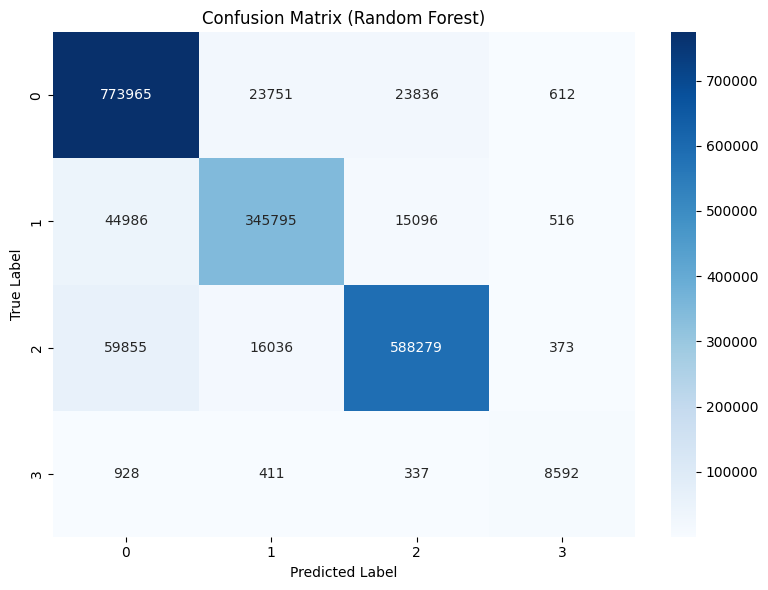

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the confusion matrix
cm = confusion_matrix(y_val, y_pred_rf)

# Plot with seaborn heatmap for a cleaner look
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=np.unique(y_val), 
            yticklabels=np.unique(y_val))
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


LightGBM (Efficient + GPU friendly)

In [ ]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

lgbm_clf = LGBMClassifier(objective='multiclass',
                          num_class=len(np.unique(y_train_sample)),
                          learning_rate=0.1,
                          max_depth=10,
                          n_estimators=100,
                          random_state=42,
                          n_jobs=-1)

lgbm_clf.fit(X_train_sample, y_train_sample,
             eval_set=[(X_val, y_val)],
             eval_metric='multi_logloss',
             callbacks=[early_stopping(stopping_rounds=10), log_evaluation(10)])

y_pred_lgb = lgbm_clf.predict(X_val)

print("📊 Classification Report (LightGBM):")
print(classification_report(y_val, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6131
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 64
[LightGBM] [Info] Start training from score -0.838612
[LightGBM] [Info] Start training from score -1.543650
[LightGBM] [Info] Start training from score -1.053257
[LightGBM] [Info] Start training from score -5.241937
Training until validation scores don't improve for 10 rounds
[10]	valid_0's multi_logloss: 0.567671
[20]	valid_0's multi_logloss: 0.455505
[30]	valid_0's multi_logloss: 0.412612
[40]	valid_0's multi_logloss: 0.378645
[50]	valid_0's multi_logloss: 0.35205
[60]	valid_0's multi_logloss: 0.330501
[70]	valid_0's multi_logloss: 0.317285
[80]	valid_0's multi_logloss: 0.305294
[90]	valid_0's multi_logloss: 0.295221
[100]	valid_0's mul

<Figure size 800x600 with 0 Axes>

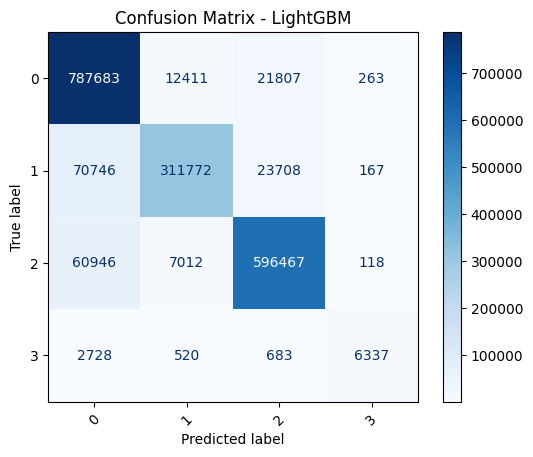

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_lgb = confusion_matrix(y_val, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=np.unique(y_val))

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='g')
plt.title("Confusion Matrix - LightGBM")
plt.show()


XGBoost (Stable + Powerful)

In [ ]:
%pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb


In [ ]:
dtrain = xgb.DMatrix(X_train_sample, label=y_train_sample)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train_sample)),
    'learning_rate': 0.1,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss'
}

watchlist = [(dtrain, 'train'), (dval, 'eval')]

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    early_stopping_rounds=10,
    verbose_eval=True
)

y_pred_xgb = xgb_model.predict(dval)
print("📊 Classification Report (XGBoost):")
print(classification_report(y_val, y_pred_xgb))


[0]	train-mlogloss:1.27574	eval-mlogloss:1.27846
[1]	train-mlogloss:1.18556	eval-mlogloss:1.19094
[2]	train-mlogloss:1.11078	eval-mlogloss:1.11648
[3]	train-mlogloss:1.04491	eval-mlogloss:1.05090
[4]	train-mlogloss:0.98523	eval-mlogloss:0.99149
[5]	train-mlogloss:0.93824	eval-mlogloss:0.94420
[6]	train-mlogloss:0.89419	eval-mlogloss:0.90041
[7]	train-mlogloss:0.85656	eval-mlogloss:0.86367
[8]	train-mlogloss:0.81624	eval-mlogloss:0.82363
[9]	train-mlogloss:0.78205	eval-mlogloss:0.78951
[10]	train-mlogloss:0.75118	eval-mlogloss:0.75963
[11]	train-mlogloss:0.72626	eval-mlogloss:0.73591
[12]	train-mlogloss:0.69743	eval-mlogloss:0.70699
[13]	train-mlogloss:0.67477	eval-mlogloss:0.68408
[14]	train-mlogloss:0.65275	eval-mlogloss:0.66341
[15]	train-mlogloss:0.63245	eval-mlogloss:0.64312
[16]	train-mlogloss:0.61521	eval-mlogloss:0.62571
[17]	train-mlogloss:0.59776	eval-mlogloss:0.61089
[18]	train-mlogloss:0.58370	eval-mlogloss:0.59657
[19]	train-mlogloss:0.56985	eval-mlogloss:0.58237
[20]	train

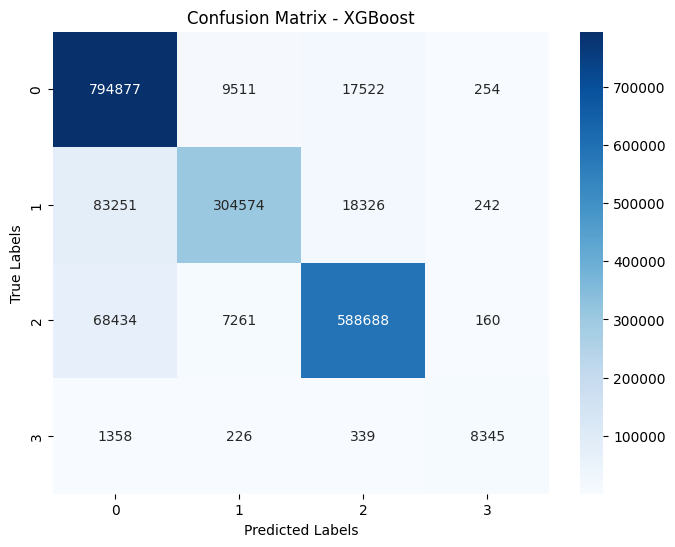

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_xgb)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBoost")
plt.show()


Neural Network (MLP Classifier from Scikit-Learn)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu',
                    solver='adam', max_iter=50, random_state=42)

mlp.fit(X_train_sample, y_train_sample)
y_pred_mlp = mlp.predict(X_val)

print("📊 Classification Report (MLP Neural Network):")
print(classification_report(y_val, y_pred_mlp))


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


📊 Classification Report (MLP Neural Network):


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.47      1.00      0.64    822164
           1       0.00      0.00      0.00    406393
           2       1.00      0.25      0.41    664543
           3       0.00      0.00      0.00     10268

    accuracy                           0.52   1903368
   macro avg       0.37      0.31      0.26   1903368
weighted avg       0.55      0.52      0.42   1903368



In [ ]:
MLPClassifier(max_iter=200, random_state=42)

MLPClassifier(random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sample)
X_val_scaled = scaler.transform(X_val)


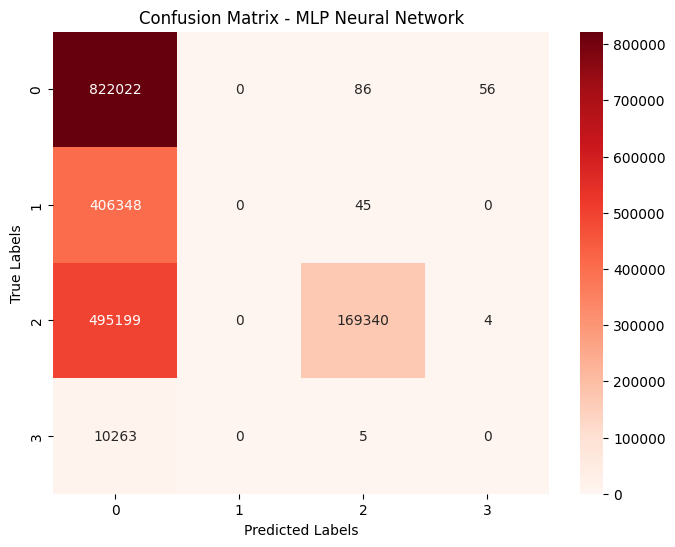

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_mlp = confusion_matrix(y_val, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='g', cmap='Reds', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - MLP Neural Network")
plt.show()


Performance Metrics:
Evaluation Code

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Get overall macro-averaged metrics
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_val, y_pred_mlp, average='macro'
)

print(f"Macro Precision: {precision_macro:.4f}")
print(f"Macro Recall   : {recall_macro:.4f}")
print(f"Macro F1-score : {f1_macro:.4f}")

# Get per-class metrics
precision_per_class, recall_per_class, f1_per_class, support = precision_recall_fscore_support(
    y_val, y_pred_mlp, average=None, labels=[0, 1, 2, 3]  # adjust labels as needed
)

# Print per-class evaluation
print("\nPer-Class Evaluation:")
labels = ['TP', 'BP', 'FP', 'Other']  # customize class names as per your dataset
for i, label in enumerate(labels):
    print(f"{label} - Precision: {precision_per_class[i]:.4f}, Recall: {recall_per_class[i]:.4f}, F1-Score: {f1_per_class[i]:.4f}, Support: {support[i]}")


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Macro Precision: 0.3683
Macro Recall   : 0.3137
Macro F1-score : 0.2623

Per-Class Evaluation:
TP - Precision: 0.4741, Recall: 0.9998, F1-Score: 0.6432, Support: 822164
BP - Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, Support: 406393
FP - Precision: 0.9992, Recall: 0.2548, F1-Score: 0.4061, Support: 664543
Other - Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000, Support: 10268


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Hyperparameter Tuning Code using GridSearchCV

In [4]:
import pandas as pd

en_df = pd.read_csv(r"C:\Soundhar\Project\Microsoft - Cybersecurity\enhanced_dataset.csv")

en_df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,...,is_weekend,day_period,is_high_risk_time,is_suspicious_activity,alerts_per_org,alerts_per_detector,alerts_per_category,Id_log,AlertId_log,IncidentId_log
0,180388628218,0,612,123247,7,6,InitialAccess,Unknown,TruePositive,Ip,...,0,Night,0,0,845009,309093,4293041,25.918379,11.721954,6.418365
1,455266534868,88,326,210035,58,43,Exfiltration,Unknown,FalsePositive,User,...,0,Night,1,0,24244,23964,1577965,26.844149,12.255034,5.789960
2,1056561957389,809,58352,712507,423,298,InitialAccess,T1189,FalsePositive,Url,...,0,Night,1,1,961,1214,4293041,27.686041,13.476546,10.974266
3,1279900258736,92,32992,774301,2,2,CommandAndControl,Unknown,BenignPositive,Url,...,0,Afternoon,0,1,16926,597497,826691,27.877803,13.559717,10.404051
4,214748368522,148,4359,188041,9,74,Execution,Unknown,TruePositive,User,...,1,Night,1,0,13938,154113,267594,26.092733,12.144421,8.380227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,Unknown,TruePositive,CloudLogonRequest,...,1,Afternoon,0,0,845009,309093,4293041,27.686041,13.115605,4.510860
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,Unknown,BenignPositive,Url,...,0,Morning,0,1,33691,597497,826691,27.836702,13.525649,12.187965
9516834,867583395122,44,14117,7425,78,57,Exfiltration,Unknown,BenignPositive,MailMessage,...,0,Evening,1,0,45128,14297,1577965,27.488977,8.912743,9.555206
9516835,395136991850,43,644,8973,52,10,Impact,Unknown,BenignPositive,Ip,...,0,Evening,1,0,48983,24002,750885,26.702498,9.102087,6.469250


In [10]:
print(en_df.columns)


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'LastVerdict', 'CountryCode', 'State', 'City',
       'SuspicionLevel_is_missing', 'LastVerdict_is_missing', 'Hour', 'Day',
       'Weekday', 'is_weekend', 'day_period', 'is_high_risk_time',
       'is_suspicious_activity', 'alerts_per_org', 'alerts_per_detector',
       'alerts_per_category', 'Id_log', 'AlertId_log', 'IncidentId_log'],
      dtype='object')


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Step 2: Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Step 3: Define full pipeline
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Step 4: Update RandomizedSearchCV to use the pipeline
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__bootstrap': [True, False]
    },
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Step 5: Fit
search.fit(X_train_sample, y_train_sample)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               SimpleImputer(),
                                                                               ['Id',
                                                                                'OrgId',
                                                                                'IncidentId',
                                                                                'AlertId',
                                                                                'DetectorId',
                                                                                'AlertTitle',
                                                                                'DeviceId',
                                                                                'Sha256',
                                                                                'IpAddress',
                                                                                'Url',
                                                                                'AccountSid',
                                                                                'AccountUpn',
                                                                                'AccountObjectId',
                                                                                'AccountName',
                                                                                'DeviceName',
                                                                                'NetworkMessageId',
                                                                                'RegistryKey',
                                                                                'RegistryValueName',
                                                                                'Reg...
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  None],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [20]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200, random_state=42)
X_reduced = svd.fit_transform(X_train_sample)

search.fit(X_reduced, y_train_sample)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Correct version — use 'Label' as the target
X = en_df.drop('LastVerdict', axis=1)
y = en_df['LastVerdict']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Sample 100,000 rows from training for faster tuning
X_train_sample = X_train.sample(n=100_000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Define model and hyperparameter grid
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Hyperparameter tuning
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
search.fit(X_train_sample, y_train_sample)

# Results
print("✅ Best Params:", search.best_params_)
print("🏆 Best Score (f1_weighted):", search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 929, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'InitialAccess'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 929, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'SuspiciousActivity'


In [15]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# One-hot encode all categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Train/validation split with encoded features
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Sample 100,000 rows from training
X_train_sample = X_train.sample(n=100_000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Define model and hyperparameter grid (same as yours)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized search
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
search.fit(X_train_sample, y_train_sample)

# Results
print("✅ Best Params:", search.best_params_)
print("🏆 Best Score (f1_weighted):", search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


MemoryError: Unable to allocate 75.9 MiB for an array with shape (1194, 66667) and data type bool

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Important: use sparse matrix from the start if using something like TfidfVectorizer
# Also, RandomForest in sklearn doesn't support sparse matrices, so convert wisely:
X_train_sample_sparse = X_train_sample.tocsr()  # if X is sparse matrix

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
)

# ❗️ Convert sparse to dense just before fitting (only if needed!)
search.fit(X_train_sample_sparse.toarray(), y_train_sample)


AttributeError: 'DataFrame' object has no attribute 'tocsr'